In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata

import matplotlib.pyplot as plt
import matplotlib as mpl


#For TF-IDF
import episcanpy as epi
from sklearn.feature_extraction.text import TfidfTransformer

In [6]:

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
import seaborn as sns
from glob import iglob
import matplotlib as mpl
import skmisc



In [2]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/integrated/fetalSurgicalSubset/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bamnostic           NA
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
episcanpy           0.3.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jup

'/opt/conda/bin/python'

In [66]:
def identityTransfer(adata_CellsNewID, adata, field='identity'):
    
    '''
    Function to transfer the value in a .obs column, modifying only the cells included in adata_CellsNewID
    
    Parameters:
        adata_CellsNewID: anndata object with cells. These should have in their .obs[field] the new values to be transfer to adata
        adata: anndata object to modify. The value in .obs[field] will be modifies for all the cells in adata_CellsNewID
        field: column name in .obs to operate in
        
    '''
    
    #converting categorical into strings to introduce new categories
    adata.obs[field]=adata.obs[field].astype("string")


    #assigning the new categories to the cells in adata
    for cell in adata_CellsNewID.obs.index:
        adata.obs[field][cell] = adata_CellsNewID.obs[field][cell]

    #Returning strings into categorical 
    adata.obs[field]=adata.obs[field].astype("category")
    
    return(adata)

In [4]:
adata= sc.read('../results/scVI/S8_scVIintegrated_fetalSurgSubset_adata.h5ad')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:35)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:03)


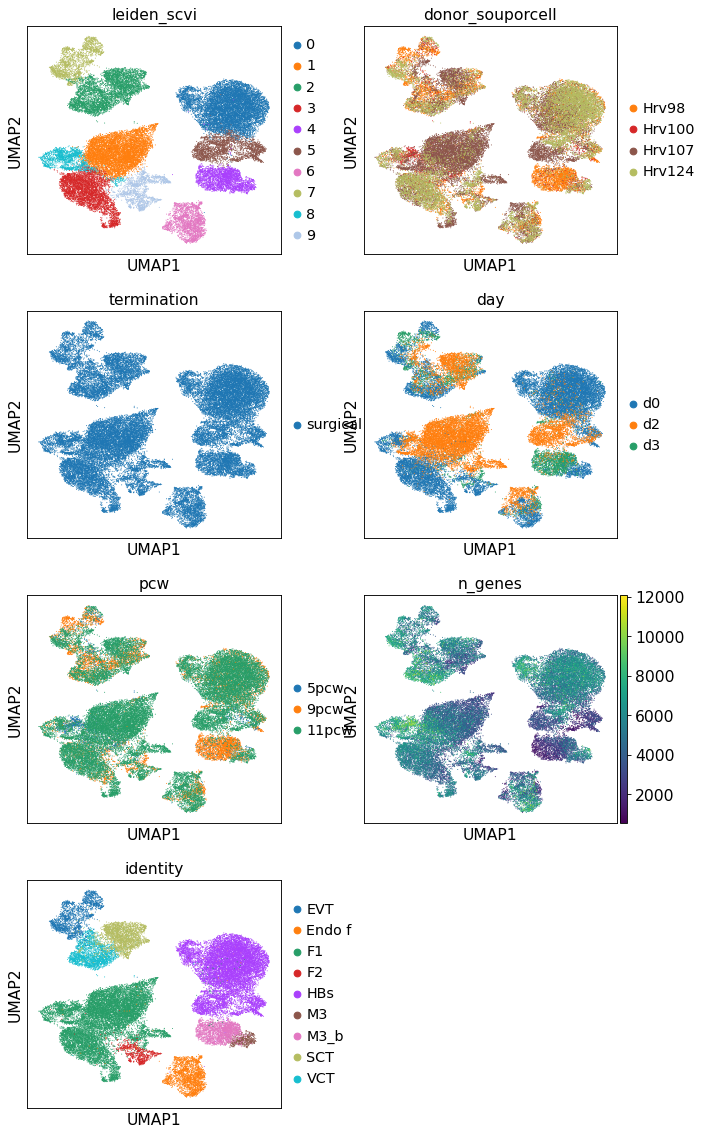

In [6]:
sc.pp.neighbors(adata, n_neighbors=20,use_rep="X_scVI_n_latent_10")
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

# use scVI imputed values for plotting
sc.pl.umap(adata, color=["leiden_scvi",'donor_souporcell', 'termination', 
                         'day','pcw','n_genes','identity' ], ncols=2)#, save='_scVI_latent30_labTransfering.pdf')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:06)


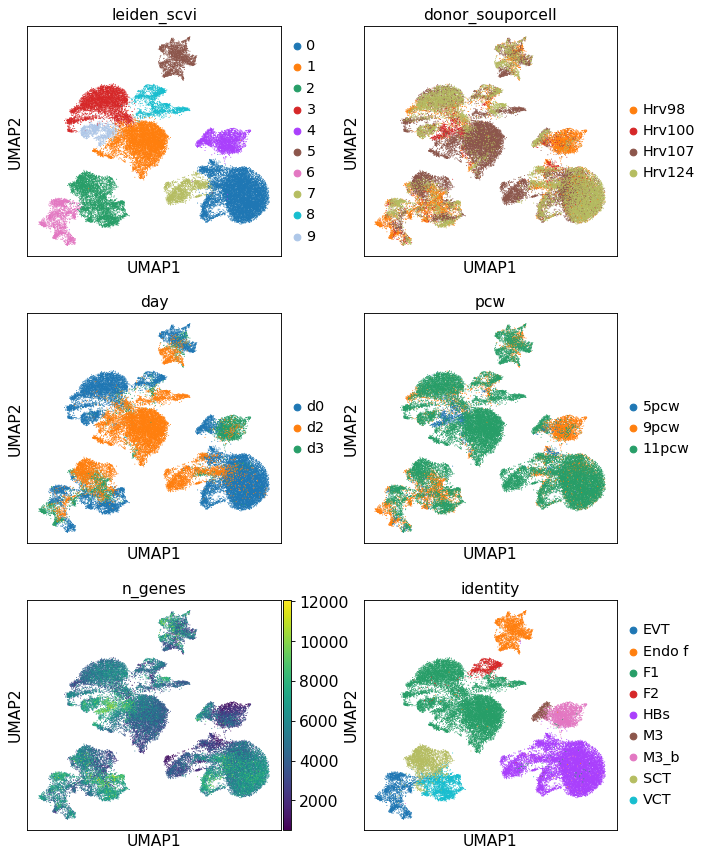

In [7]:
sc.pp.neighbors(adata, n_neighbors=20,use_rep="X_scVI_n_latent_20")
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

# use scVI imputed values for plotting
sc.pl.umap(adata, color=["leiden_scvi",'donor_souporcell', 
                         'day','pcw','n_genes','identity' ], ncols=2)#, save='_scVI_latent30_labTransfering.pdf')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:04)


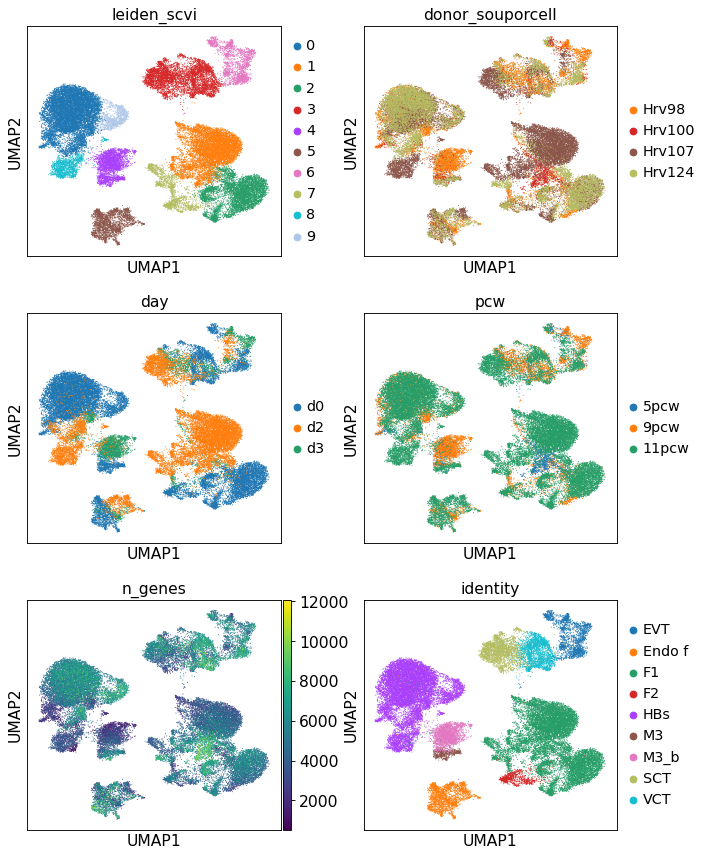

In [8]:
sc.pp.neighbors(adata, n_neighbors=20,use_rep="X_scVI_n_latent_30")
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

# use scVI imputed values for plotting
sc.pl.umap(adata, color=["leiden_scvi",'donor_souporcell', 
                         'day','pcw','n_genes','identity' ], ncols=2)#, save='_scVI_latent30_labTransfering.pdf')

#### I will keep the Latent=20

In [5]:
sc.pp.neighbors(adata, n_neighbors=20,use_rep="X_scVI_n_latent_20")
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden_scvi", resolution=0.3)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:32)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:06)


### Re-labelling the M3_b as M3 only

In [6]:
temp_cells = adata[adata.obs['identity'] == 'M3_b']



#Function that changes the cluster names as indicated
temp_cells.obs['identity'] = (temp_cells.obs["identity"].map(lambda x: 
                            {"M3_b": "M3"}
                            .get(x, x)).astype("category"))

adata= identityTransfer(temp_cells, adata)

Trying to set attribute `.obs` of view, copying.


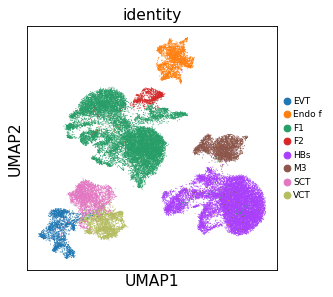

In [7]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['identity' ],legend_fontsize='xx-small')#, save='_scVI_latent30_labTransfering.pdf')

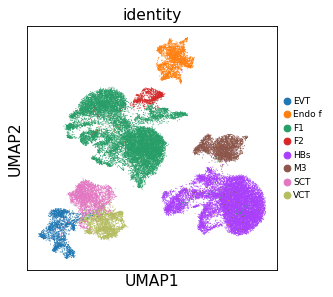

In [49]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['identity' ],legend_fontsize='xx-small',
           save='_scVI_latent20_fetal_identity.pdf')#, save='_scVI_latent30_labTransfering.pdf')

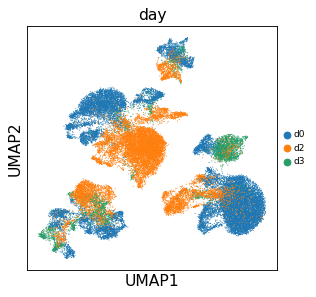

In [17]:

# use scVI imputed values for plotting
sc.pl.umap(adata, color=['day' ],legend_fontsize='xx-small',
           save='_scVI_latent20_fetal_day.pdf')#, save='_scVI_latent30_labTransfering.pdf')

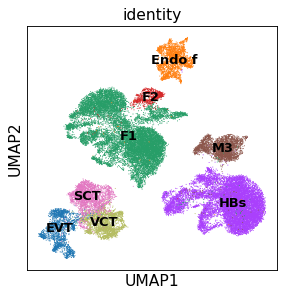

In [48]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['identity' ],legend_fontsize='small',legend_loc= 'on data',
           save='_scVI_latent20_fetal_identity_ondata.pdf')#, save='_scVI_latent30_labTransfering.pdf')

### Adding a column to metadata. Binary category for explant and D0

In [8]:
#COpying the value of the leiden cluster. The new column will help to change it's values for
# the cluster identity
adata.obs['Tissue_type']= adata.obs['day']



#Function that changes the cluster names as indicated
adata.obs['Tissue_type'] = (adata.obs["Tissue_type"].map(lambda x: 
                            {"d0": "Fresh", "d2": "Explant", "d3": "Explant"}
                            .get(x, x)).astype("category"))


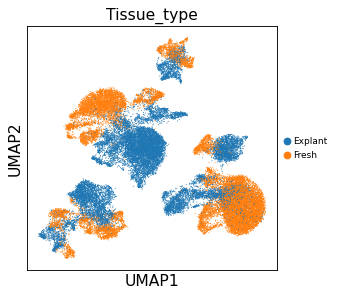

In [9]:

# use scVI imputed values for plotting
sc.pl.umap(adata, color=['Tissue_type' ],legend_fontsize='xx-small',
           save='_scVI_latent20_fetal_TissueType.pdf')#, save='_scVI_latent30_labTransfering.pdf')

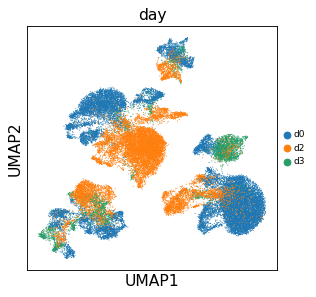

In [70]:

# use scVI imputed values for plotting
sc.pl.umap(adata, color=['day' ],legend_fontsize='xx-small')#, save='_scVI_latent30_labTransfering.pdf')

In [22]:
#Saving the modified object
adata.write('../results/scVI/S8_scVIintegrated_fetalSurgSubset_adata_latent20.h5ad')

In [225]:
#Saving the modified object
adata=sc.read('../results/scVI/S8_scVIintegrated_fetalSurgSubset_adata_latent20.h5ad')

## Calculate cell-cycle scores AND (optional)regress out cell cycle genes
Here I perform cell cycle scoring. To score a gene list, the algorithm calculates the difference of mean expression of the given list and the mean expression of reference genes. To build the reference, the function randomly chooses a bunch of genes matching the distribution of the expression of the given list. Cell cycle scoring adds three slots in data, a score for S phase, a score for G2M phase and the predicted cell cycle phase.

First read the file with cell cycle genes, from Regev lab and split into S and G2M phase genes. Cell cycle genes were retrieved from the scanpy_usage github site via web browser at RegevLab Github repo.

In [126]:
cell_cycle_genes = [x.strip() for x in open('../data/regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
s_genes = [x for x in s_genes if x in adata.var_names]
g2m_genes = [x for x in g2m_genes if x in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    461 total control genes are used. (0:00:03)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    500 total control genes are used. (0:00:03)
-->     'phase', cell cycle phase (adata.obs)


... storing 'phase' as categorical


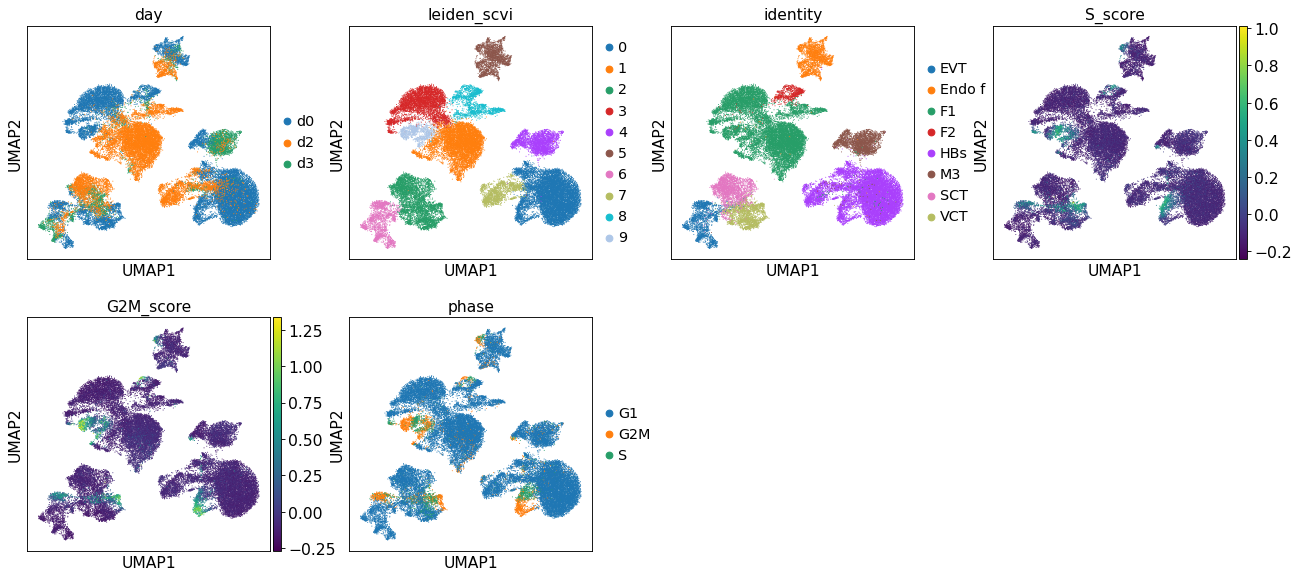

In [127]:
#clustering
sc.pl.umap(adata, color=['day', 'leiden_scvi','identity','S_score', 'G2M_score', 'phase'])

In [128]:
#Saving the modified object
adata.write('../results/scVI/S8_scVIintegrated_fetalSurgSubset_adata_latent20.h5ad')

### Re-annotating the Fibroblast populations

I will explore the annotation reported by:

**Suryawanshi, H., et al. (2018). A single-cell survey of the human first-trimester placenta and decidua. Science advances, 4(10), eaau4788.** 

In [226]:
#Selecting the cells in the desired clusters
temp_cells = adata[adata.obs['identity'] == 'F1']
temp_cells2= adata[adata.obs['identity'] == 'F2']

Fibroblasts = temp_cells.concatenate(temp_cells2, index_unique=None)

In [227]:
del(temp_cells, temp_cells2)

... storing 'leiden_pca' as categorical
... storing 'leiden_scvi' as categorical
... storing 'celltype_predictions' as categorical
... storing 'identity' as categorical


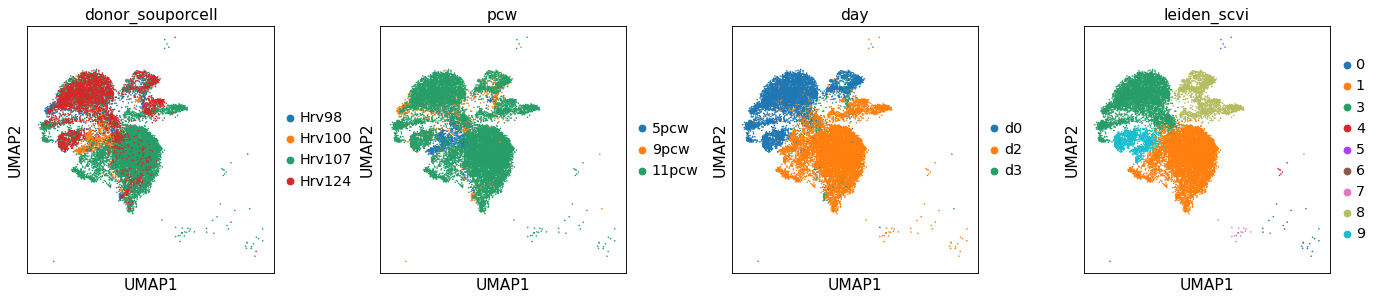

In [228]:
sc.pl.umap(Fibroblasts, color=['donor_souporcell', 'pcw','day','leiden_scvi'], color_map='OrRd',wspace=0.3, )

In [229]:
Fibroblasts.obs['leiden_scvi2']= Fibroblasts.obs['leiden_scvi']

In [230]:
#LATENT 30
sc.pp.neighbors(Fibroblasts, n_neighbors=20, use_rep="X_scVI_n_latent_30")
sc.tl.umap(Fibroblasts)

#clustering
sc.tl.leiden(Fibroblasts, key_added="leiden_scvi", resolution=0.2)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:00)


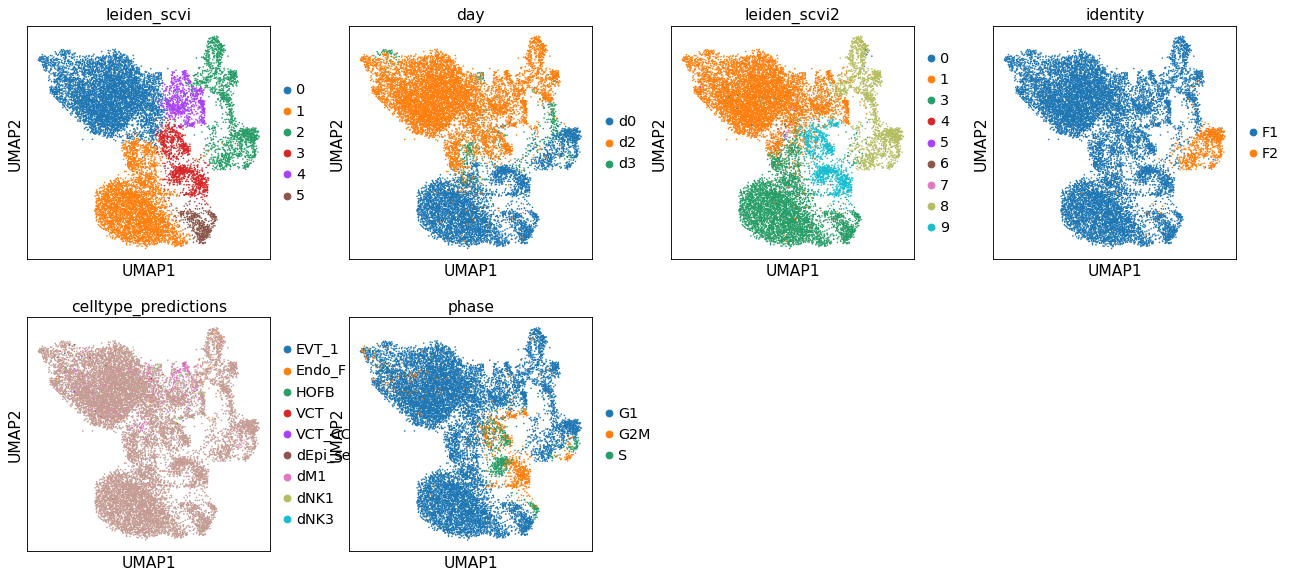

In [135]:

#clustering
sc.pl.umap(Fibroblasts, color=["leiden_scvi",'day', 'leiden_scvi2','identity','celltype_predictions','phase' ])

##### NOTE :Clearly leiden_scvi c3 (leiden_scvi2 c9) are proliferative F1 fibroblasts

In [35]:
marker_genes = {
    'F1':{'COL1A1', 'COL1A2', 'COL3A1', 'OGN','S100A4'}, 
    'F2': {'REN', 'AGTR1', 'IGFBP7', 'AREG'},
    'F3':{'IL6', 'PTGDS', 'CFD', 'CXCL2','BDKRB1'},
}

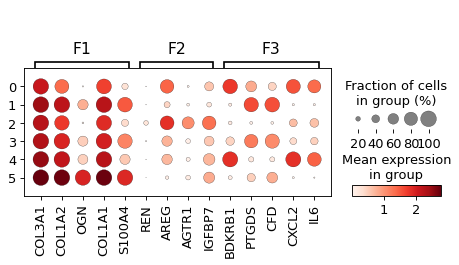

In [27]:
sc.pl.dotplot(Fibroblasts, marker_genes, groupby='leiden_scvi', use_raw=False)

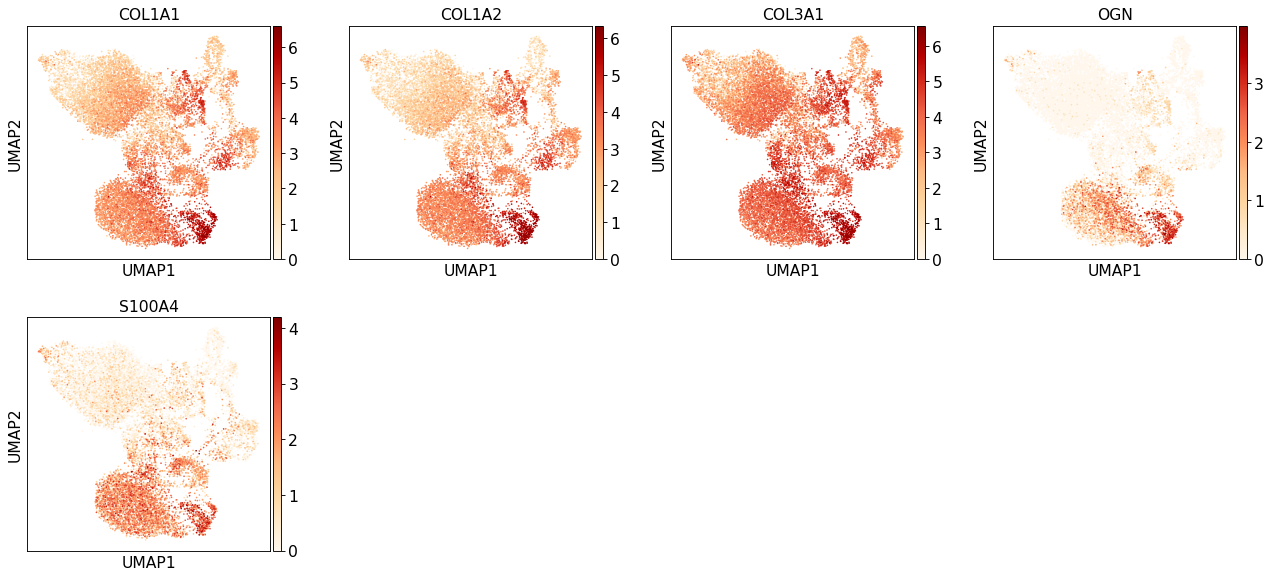

In [41]:
sc.pl.umap(Fibroblasts, color=['COL1A1', 'COL1A2', 'COL3A1', 'OGN','S100A4'], color_map='OrRd')

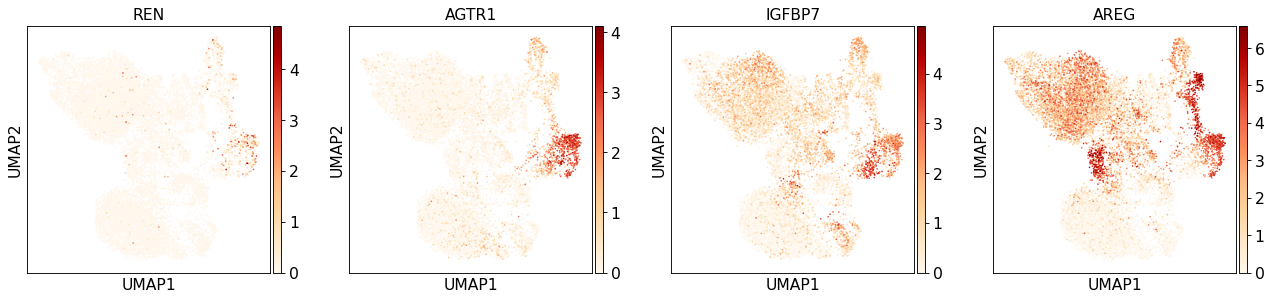

In [42]:
sc.pl.umap(Fibroblasts, color=['REN', 'AGTR1', 'IGFBP7', 'AREG'], color_map='OrRd')

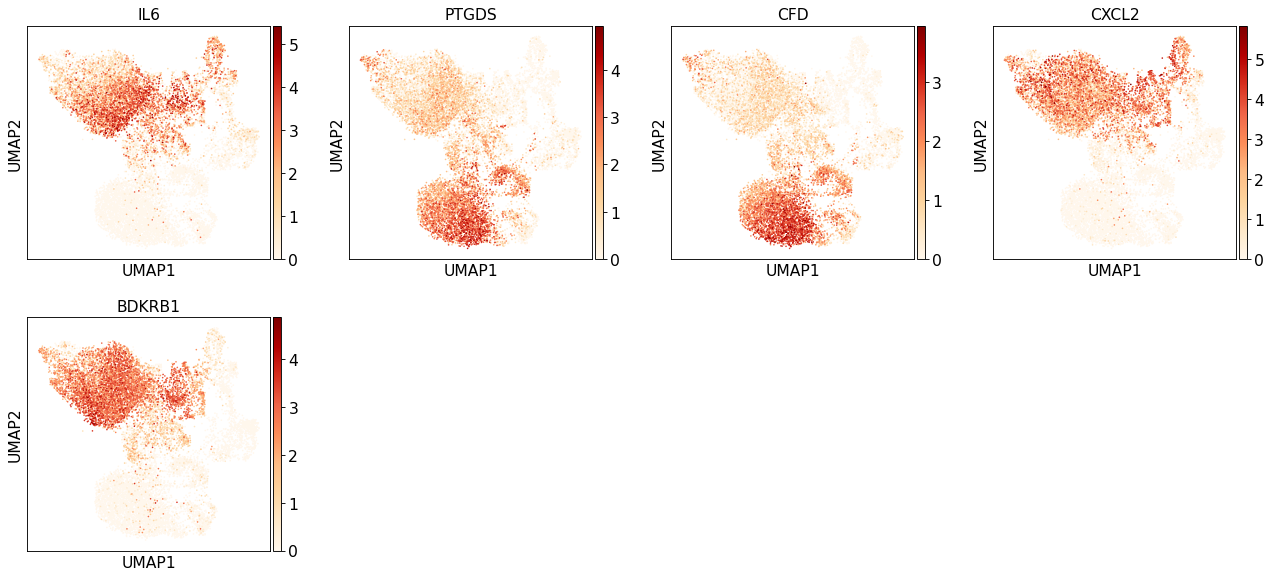

In [45]:
sc.pl.umap(Fibroblasts, color=['IL6', 'PTGDS', 'CFD', 'CXCL2','BDKRB1'], color_map='OrRd')

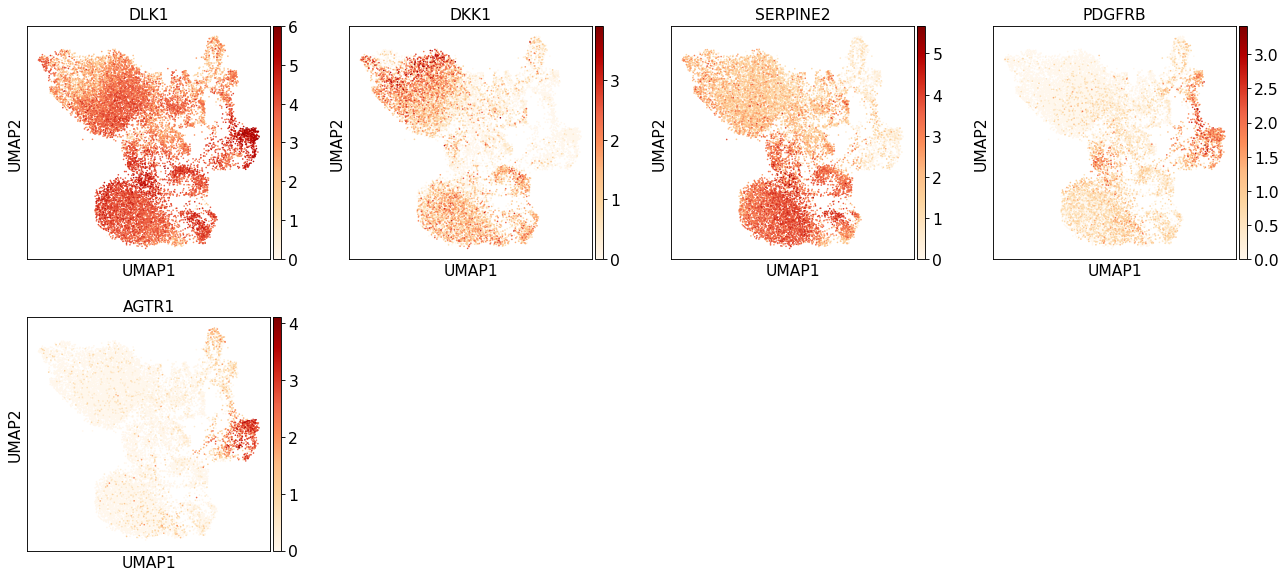

In [40]:
sc.pl.umap(Fibroblasts, color=['DLK1', 'DKK1','SERPINE2','PDGFRB','AGTR1'], color_map='OrRd')

* Vento-Tormo 2018 Fibroblasts differential markers

F1: DKK1, SERPINE2


F2: PDGFRB, AGTR1

In [46]:
marker_genesVento = {
    'F':{'DLK1', 'COL6A2'},
    'F1':{'DKK1', 'SERPINE2'}, 
    'F2': {'PDGFRB', 'AGTR1'}
}

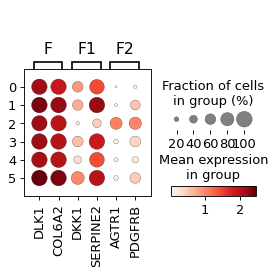

In [47]:
sc.pl.dotplot(Fibroblasts, marker_genesVento, groupby='leiden_scvi', use_raw=False)

##### *NOTE:*

##### F1 and F2 in both annotations correspon to the same populations. The F3 is basically only driven by inflammation.

Therefore it is confusing to use this annotation here as the explant cells are expressing inflammation traits.
I will just use the Vento-Tormo 2018 annotation

In [235]:
adata_counts = anndata.AnnData(X=Fibroblasts.raw.X, var=Fibroblasts.raw.var, obs=Fibroblasts.obs, asview=False)

# Binarize counts matrix (1 if expressed, 0 otherwise)
adata_bin = epi.pp.binarize(adata_counts, copy=True)
adata_bin.X.shape


# Compute TF-IDF
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(adata_bin.X.T)
adata_bin.X = tfidf.T
adata_bin.X.shape



(14516, 31625)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:33)


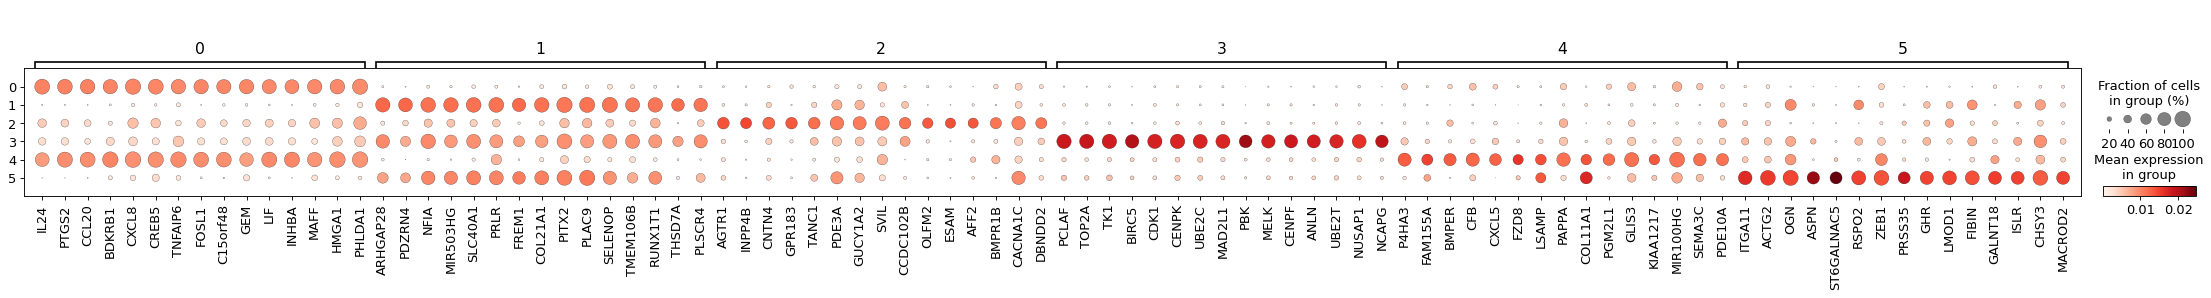

In [236]:

#Compute Mann-Withney test with scanpy
sc.tl.rank_genes_groups(adata_bin, groupby='leiden_scvi', use_raw=False, method='wilcoxon') #, method='logreg'



#Plot TF-IDF values
sc.pl.rank_genes_groups_dotplot(adata_bin, n_genes=15, dendrogram=False, save='rawtfidf_scanpy.pdf')

In [242]:
sc.get.rank_genes_groups_df(adata_bin, group='5', pval_cutoff=0.001, log2fc_min=2).head(5)

names     scores  logfoldchanges          pvals      pvals_adj
0      ITGA11  26.819704        2.491174  1.903873e-158  2.006999e-154
1       ACTG2  26.366533        2.117510  3.317320e-153  2.622756e-149
2        ASPN  25.994717        3.792901  5.682287e-149  2.995039e-145
3  ST6GALNAC5  25.571093        4.419862  3.199796e-144  1.264919e-140
4       RSPO2  24.598331        2.145325  1.316168e-133  4.624869e-130

##### NOTE: Cluster 3 are F1 expressing cell cycle /proliferation genes. I will name these cells as F1_p (F1 proliferative)

In [243]:
#COpying the value of the leiden cluster. The new column will help to change it's values for
# the cluster identity
Fibroblasts.obs['identity']= Fibroblasts.obs['leiden_scvi']


#Function that changes the cluster names as indicated
Fibroblasts.obs['identity'] = (Fibroblasts.obs["leiden_scvi"].map(lambda x: 
                            {"0": "F1", "1": "F1", "2": "F2",
                             "3": "F1_p","4": "F1","5": "F1"}
                            .get(x, x)).astype("category"))

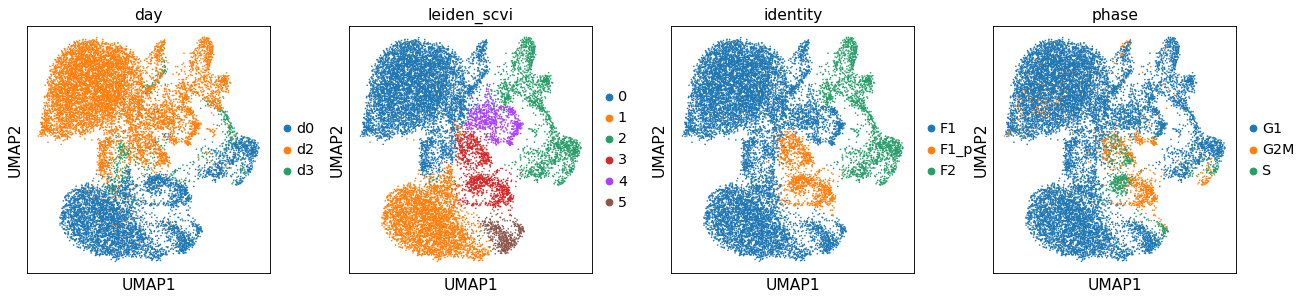

In [244]:

#clustering
sc.pl.umap(Fibroblasts, color=['day', 'leiden_scvi','identity','phase'])

In [245]:
#Assigning the old leiden cluster name to the original column. This to avoid confusions in the object
Fibroblasts.obs['leiden_scvi']= Fibroblasts.obs['leiden_scvi2']

#Removing the temp column that keep the old
Fibroblasts.obs= Fibroblasts.obs.drop(columns=['leiden_scvi2'])

In [246]:
adata= identityTransfer(Fibroblasts, adata)

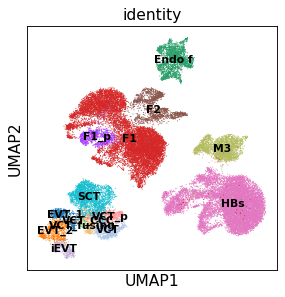

In [247]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['identity' ], legend_loc='on data',legend_fontsize='x-small')

In [248]:
#Saving the modified object
adata.write('../results/scVI/S8_scVIintegrated_fetalSurgSubset_adata_latent20.h5ad')

### Plotting marker genes per population

In [144]:
marker_genes = {
    'F1':{'DKK1','SERPINE2'},
    'F1 & F2':{'DLK1','COL6A2'},
    'F2': {'DLK1', 'AGTR1','PDGFRB'},
    'Endo f':{'PECAM1'}, #'LYVE1'
    'HB': {'CD14', 'FOLR2', 'LYVE1'},
    'M3':{"CD9", 'MMP9', 'IL1B'},
    'SCT':{'SDC1'},#EGFR
    'SCT & VCT':{'EGFR'},
    'VCT': {'PAGE4'},#EGFR, GATA3
    'EVT': {'GATA3',"HLA-G"} #'GATA3',
    
}

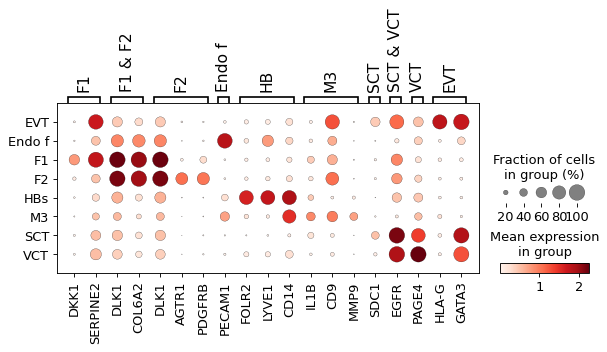

In [145]:
sc.pl.dotplot(adata, marker_genes, groupby='identity', use_raw=False)

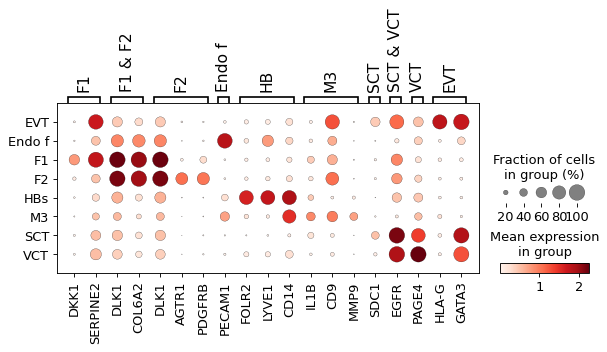

In [146]:
sc.pl.dotplot(adata, marker_genes, groupby='identity', use_raw=False,
              save='scVI_latent20_fetal_identityMarkers.pdf')

In [151]:
del(Fibroblasts)

### Re-annotating the Trophoblast sub-populations

I will explore the annotation reported Anna Arutyunyan:

 

In [152]:
#Selecting the cells in the desired clusters
temp_cells = adata[adata.obs['identity'] == 'SCT']
temp_cells2= adata[adata.obs['identity'] == 'VCT']
temp_cells3= adata[adata.obs['identity'] == 'EVT']

Trophoblasts = temp_cells.concatenate(temp_cells2, temp_cells3, index_unique=None)

In [ ]:
del(temp_cells, temp_cells2, temp_cells3)

... storing 'leiden_pca' as categorical
... storing 'leiden_scvi' as categorical
... storing 'celltype_predictions' as categorical
... storing 'identity' as categorical


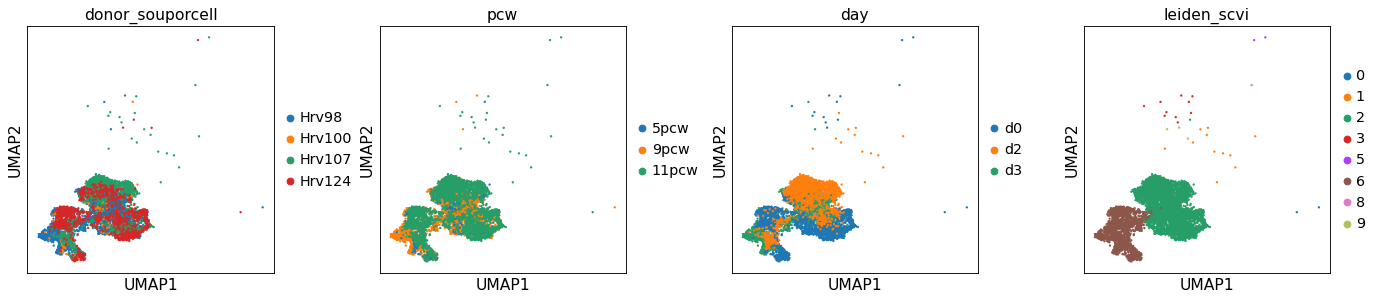

In [155]:
sc.pl.umap(Trophoblasts, color=['donor_souporcell', 'pcw','day','leiden_scvi'], color_map='OrRd',wspace=0.3)

In [156]:
Trophoblasts.obs['leiden_scvi2']= Trophoblasts.obs['leiden_scvi']

In [212]:
#LATENT 30
sc.pp.neighbors(Trophoblasts, n_neighbors=15, use_rep="X_scVI_n_latent_20")
sc.tl.umap(Trophoblasts)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


running Leiden clustering
    finished: found 11 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:00)


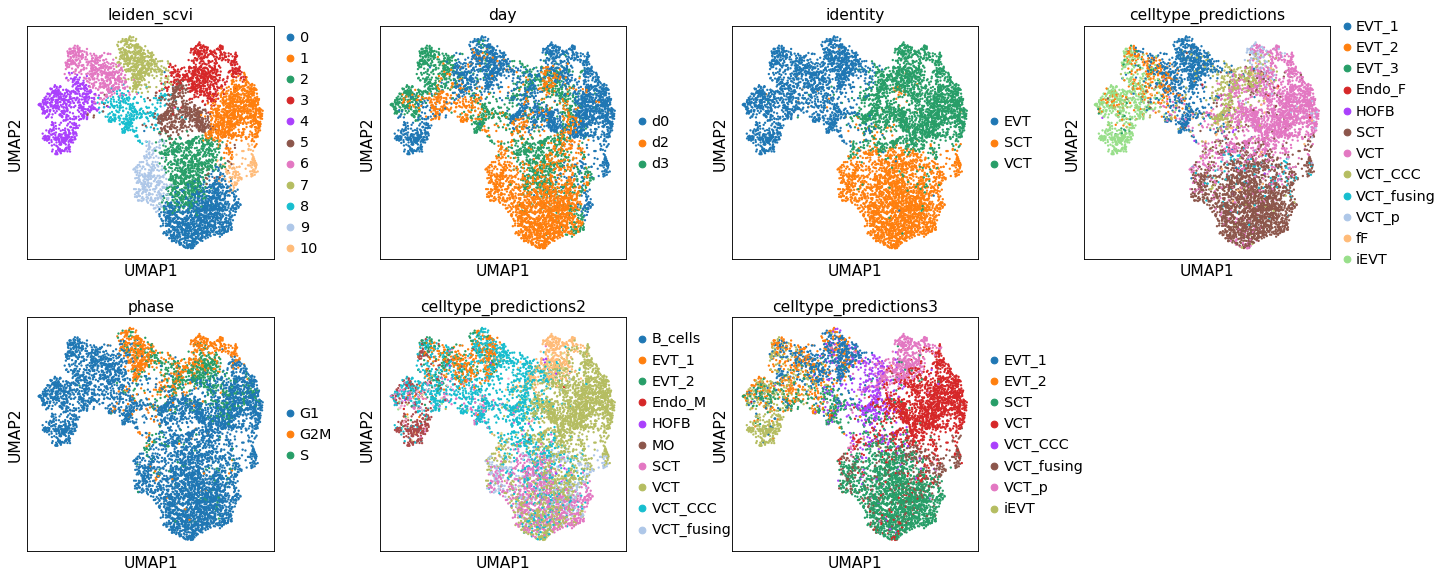

In [222]:
#clustering
sc.tl.leiden(Trophoblasts, key_added="leiden_scvi", resolution=0.6)


sc.pl.umap(Trophoblasts, color=["leiden_scvi",'day', 'identity','celltype_predictions','phase',
                                'celltype_predictions2','celltype_predictions3' ],wspace=0.3,)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden_scvi', the cluster labels (adata.obs, categorical) (0:00:00)


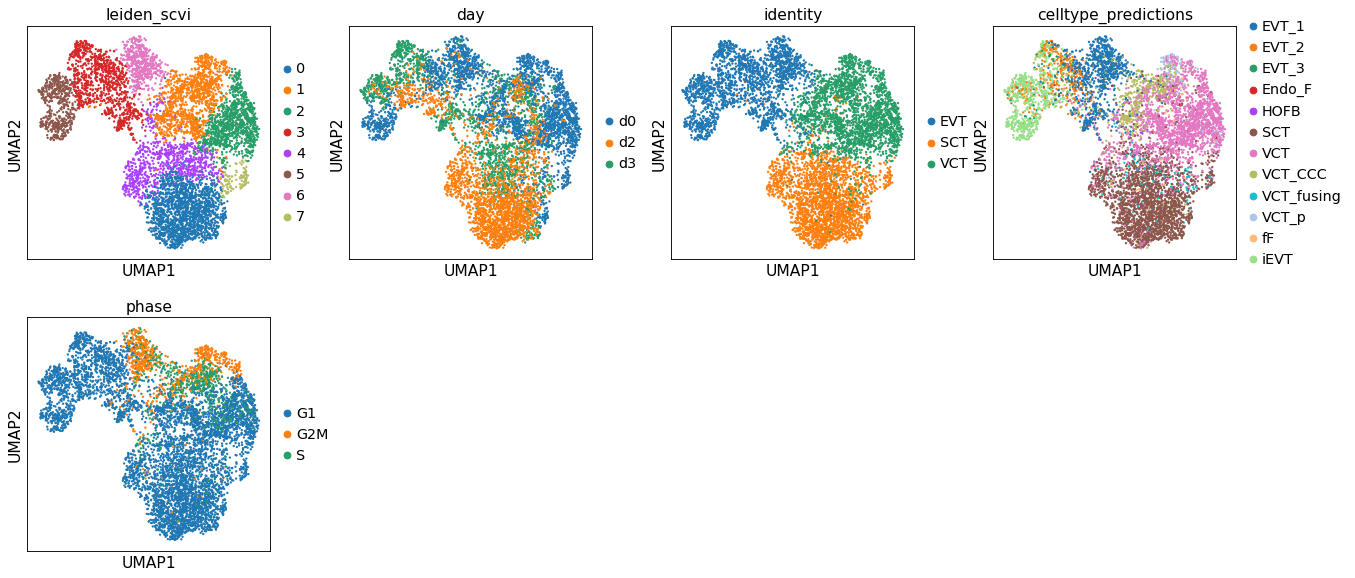

In [165]:
#clustering
sc.tl.leiden(Trophoblasts, key_added="leiden_scvi", resolution=0.5)


sc.pl.umap(Trophoblasts, color=["leiden_scvi",'day', 'identity','celltype_predictions','phase' ])

In [166]:
#Saving the modified object
Trophoblasts.write('../results/scVI/S9_scVIintegrated_Trophoblasts_latent20.h5ad')

In [178]:
#Trophoblasts=sc.read('../results/scVI/S9_scVIintegrated_Trophoblasts_latent30.h5ad')